In [304]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, mean_squared_error,r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm


red = pd.read_csv('C:\program\winequality-red.csv', low_memory=False, sep=';')
white = pd.read_csv('C:\program\winequality-white.csv', low_memory=False, sep=';')

In [199]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [200]:
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [201]:
red.shape

(1599, 12)

In [202]:
white.shape

(4898, 12)

In [203]:
red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [204]:
white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [205]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [206]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [207]:
red.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [208]:
white.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [209]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [210]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [211]:
# create a table with data missing 
missing_values=red.isnull().sum() # missing values

percent_missing = red.isnull().sum()/red.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing  
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0
sulphates,0,0.0


In [212]:
# create a table with data missing 
missing_values=white.isnull().sum() # missing values

percent_missing = white.isnull().sum()/white.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing  
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0
sulphates,0,0.0


<Axes: >

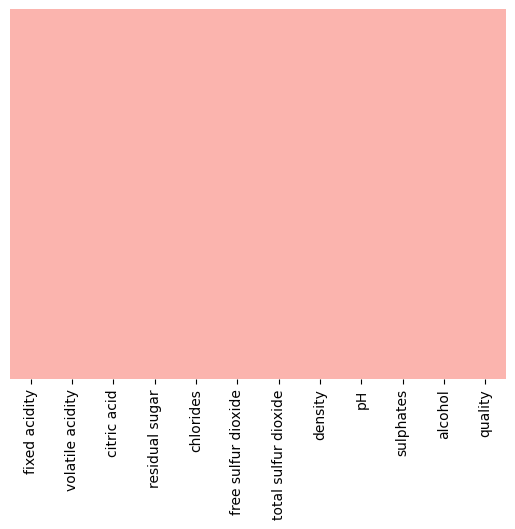

In [213]:
sns.heatmap(red.isnull(),yticklabels=False,cbar=False,cmap='Pastel1')

<Axes: >

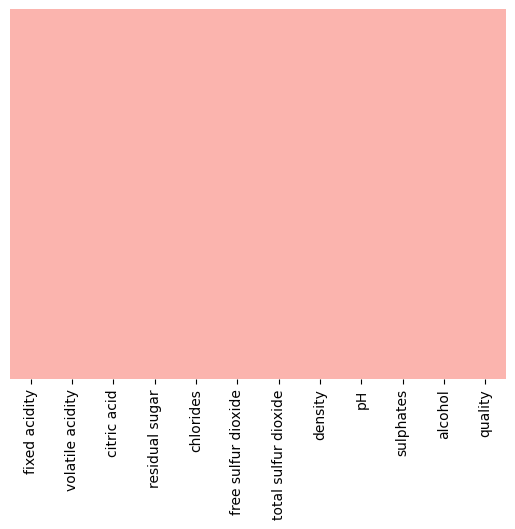

In [144]:
sns.heatmap(white.isnull(),yticklabels=False,cbar=False,cmap='Pastel1')

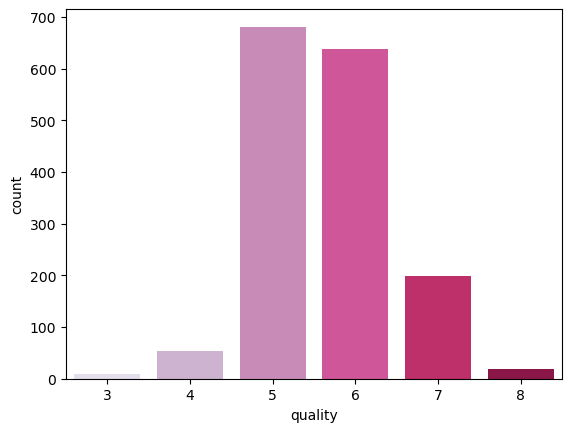

In [214]:
ax = sns.countplot(x='quality',data=red, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

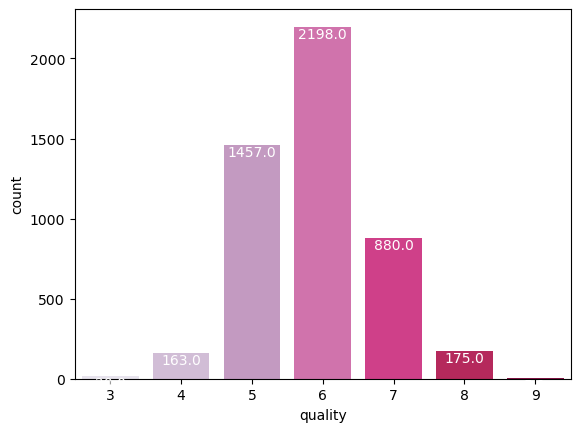

In [215]:
ax = sns.countplot(x='quality',data=white, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

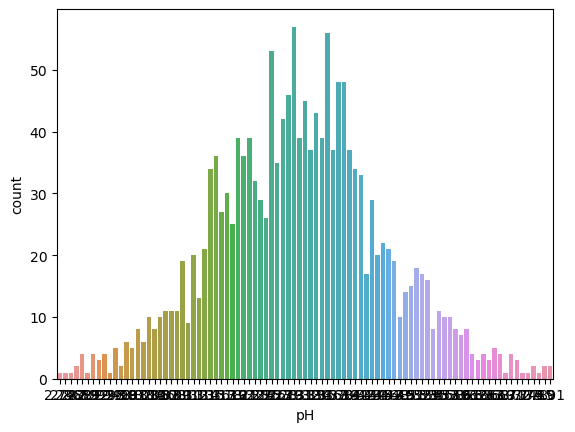

In [113]:
ax = sns.countplot(x='pH',data=red)
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

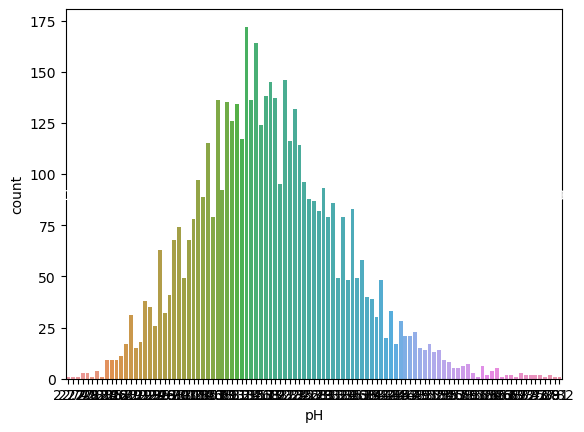

In [216]:
ax = sns.countplot(x='pH',data=white)
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

In [217]:
# print frequency distributions of wines' quality 
def frequencyDists(red):
    print("This is the frequency distribution of the wines' quality.")
    print(red.groupby("quality").size()*100 / len(red))
    print()

frequencyDists(red)

This is the frequency distribution of the wines' quality.
quality
3     0.625391
4     3.314572
5    42.589118
6    39.899937
7    12.445278
8     1.125704
dtype: float64



In [218]:
# print frequency distributions of wines' quality 
def frequencyDists(white):
    print("This is the frequency distribution of the wines' quality.")
    print(white.groupby("quality").size()*100 / len(red))
    print()

frequencyDists(white)

This is the frequency distribution of the wines' quality.
quality
3      1.250782
4     10.193871
5     91.119450
6    137.460913
7     55.034396
8     10.944340
9      0.312695
dtype: float64



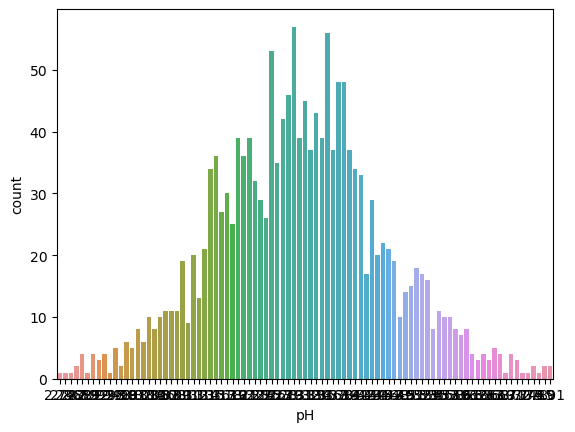

In [219]:
ax = sns.countplot(x='pH',data=red)
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

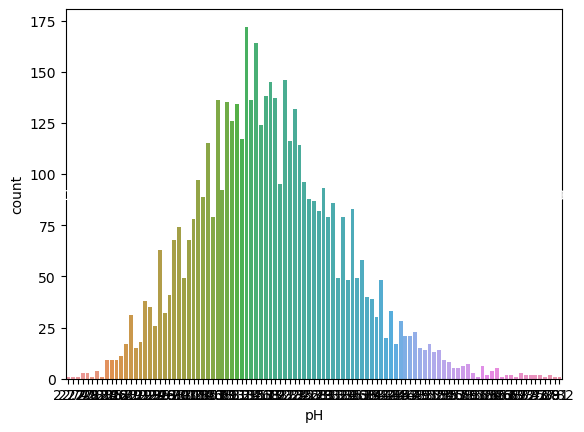

In [220]:
ax = sns.countplot(x='pH',data=white)
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

In [221]:
# Add a column 'quality_mark'
def add_categ_quality(wine_set):
    low = wine_set[wine_set['quality'] <= 5]
    medium = wine_set[(wine_set['quality'] == 6) | (wine_set['quality'] == 7)]
    high = wine_set[wine_set['quality'] > 7]
    
    low['quality_mark'] = 'low'
    medium['quality_mark'] = 'medium'
    high['quality_mark'] = 'high'
    
    frames = [low, medium, high]
    return pd.concat(frames)

In [222]:
e=LabelEncoder()

In [223]:
e

LabelEncoder()

In [224]:
red['fixed acidity']=e.fit_transform(red['fixed acidity'])
red['volatile acidity']=e.fit_transform(red['volatile acidity'])
red['citric acid']=e.fit_transform(red['citric acid'])
red['residual sugar']=e.fit_transform(red['residual sugar'])
red['chlorides']=e.fit_transform(red['chlorides'])
red['free sulfur dioxide']=e.fit_transform(red['free sulfur dioxide'])
red[' total sulfur dioxide total ']=e.fit_transform(red['total sulfur dioxide'])
red['density']=e.fit_transform(red['density'])
red['pH']=e.fit_transform(red['pH'])
red['sulphates']=e.fit_transform(red['sulphates'])
red['alcohol']=e.fit_transform(red['alcohol'])
red['quality']=e.fit_transform(red['quality'])

In [225]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total sulfur dioxide total
0,27,76,0,10,39,11,34.0,342,63,18,11,2,28
1,31,112,0,22,61,25,67.0,271,32,30,17,2,61
2,31,88,4,17,55,15,54.0,287,38,27,17,2,48
3,65,12,56,10,38,17,60.0,354,28,20,17,3,54
4,27,76,0,10,39,11,34.0,342,63,18,11,2,28


In [226]:
white['fixed acidity']=e.fit_transform(white['fixed acidity'])
white['volatile acidity']=e.fit_transform(white['volatile acidity'])
white['citric acid']=e.fit_transform(white['citric acid'])
white['residual sugar']=e.fit_transform(white['residual sugar'])
white['chlorides']=e.fit_transform(white['chlorides'])
white['free sulfur dioxide']=e.fit_transform(white['free sulfur dioxide'])
white[' total sulfur dioxide total ']=e.fit_transform(white['total sulfur dioxide'])
white['density']=e.fit_transform(white['density'])
white['pH']=e.fit_transform(white['pH'])
white['sulphates']=e.fit_transform(white['sulphates'])
white['alcohol']=e.fit_transform(white['alcohol'])
white['quality']=e.fit_transform(white['quality'])

In [227]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total sulfur dioxide total
0,31,36,36,302,34,57,170.0,878,23,22,5,3,146
1,23,42,34,17,38,13,132.0,471,53,26,12,3,106
2,43,38,40,101,39,33,97.0,560,49,21,24,3,69
3,34,28,32,128,47,59,186.0,601,42,17,21,3,163
4,34,28,32,128,47,59,186.0,601,42,17,21,3,163


In [228]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total sulfur dioxide total
0,27,76,0,10,39,11,34.0,342,63,18,11,2,28
1,31,112,0,22,61,25,67.0,271,32,30,17,2,61
2,31,88,4,17,55,15,54.0,287,38,27,17,2,48
3,65,12,56,10,38,17,60.0,354,28,20,17,3,54
4,27,76,0,10,39,11,34.0,342,63,18,11,2,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,15,56,8,11,53,32,44.0,119,57,20,26,2,38
1595,12,47,10,15,25,40,51.0,135,64,38,36,3,45
1596,16,42,13,17,39,29,40.0,185,54,37,33,3,34
1597,12,65,12,11,38,32,44.0,164,69,33,23,2,38


In [229]:
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total sulfur dioxide total
0,31,36,36,302,34,57,170.0,878,23,22,5,3,146
1,23,42,34,17,38,13,132.0,471,53,26,12,3,106
2,43,38,40,101,39,33,97.0,560,49,21,24,3,69
3,34,28,32,128,47,59,186.0,601,42,17,21,3,163
4,34,28,32,128,47,59,186.0,601,42,17,21,3,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,22,24,29,17,28,26,92.0,224,50,27,47,3,64
4894,27,46,36,120,36,73,168.0,544,38,23,15,2,144
4895,26,30,19,9,30,33,111.0,347,22,23,11,3,83
4896,14,40,30,7,11,21,110.0,29,57,15,84,4,82


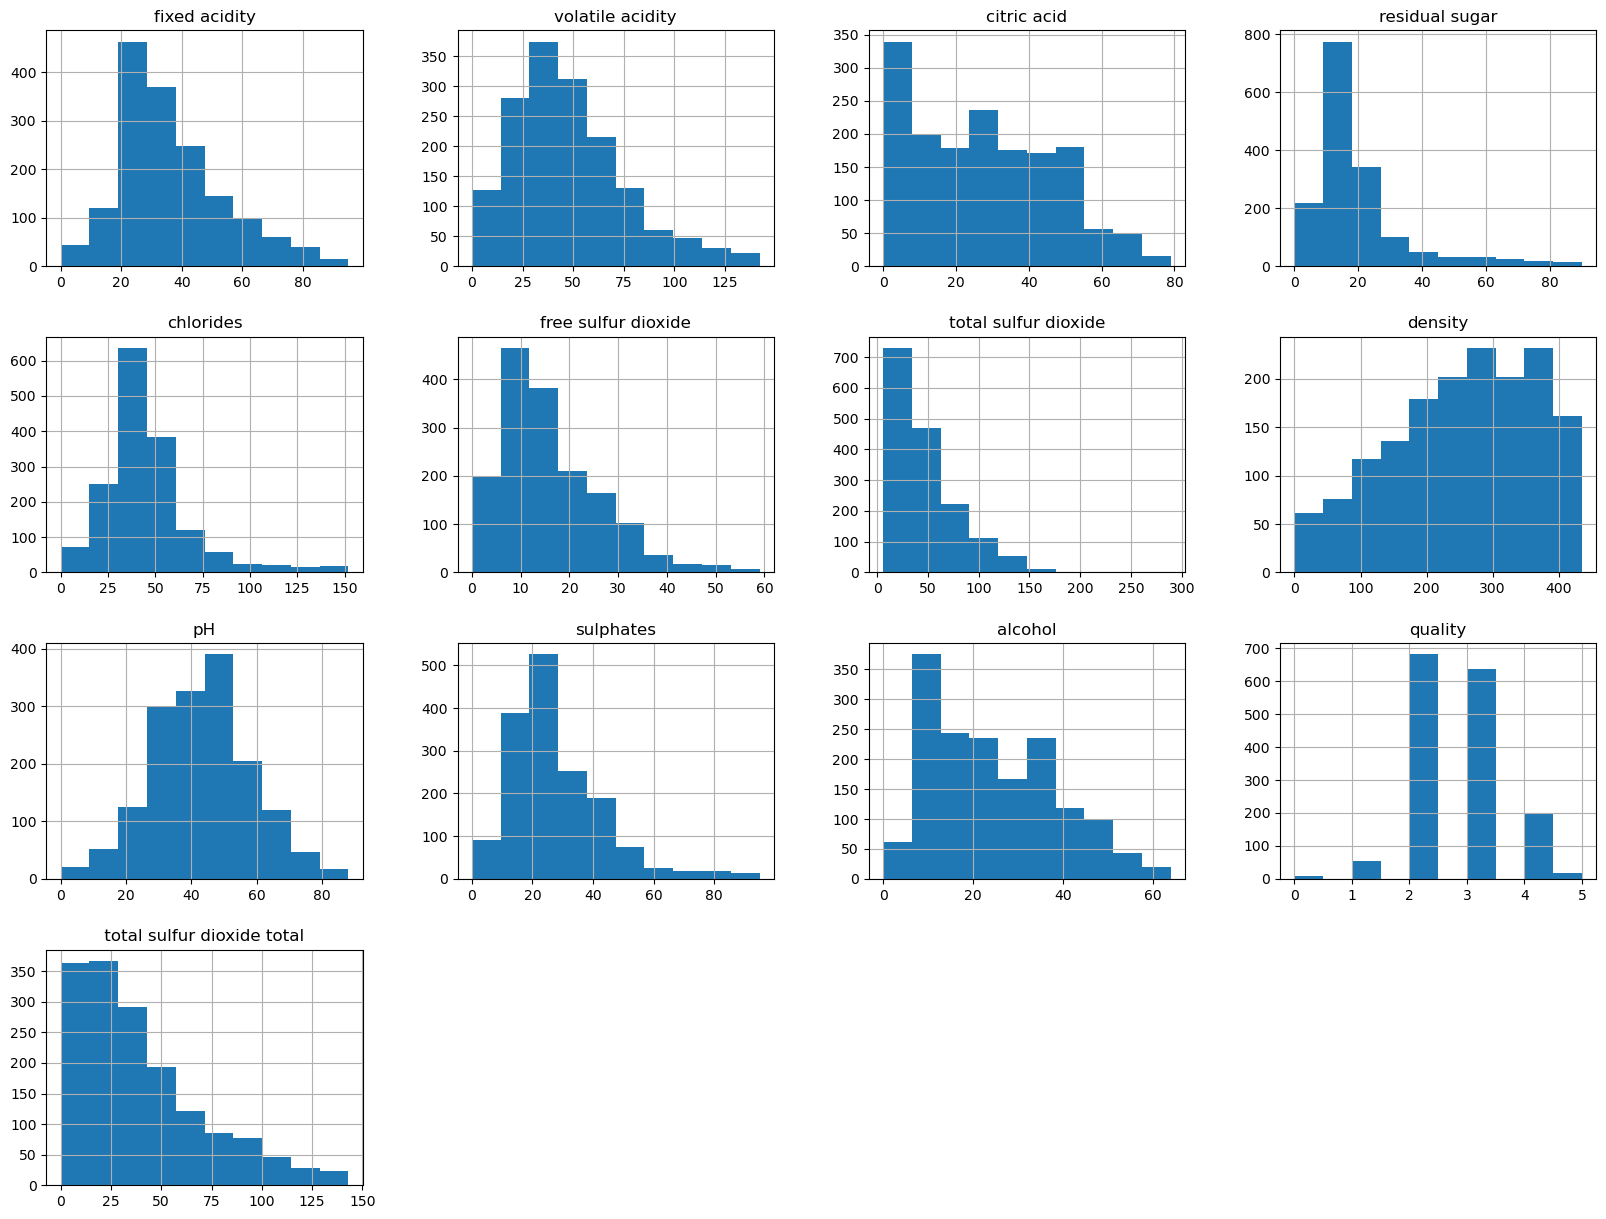

In [230]:
red.hist(figsize=(20,15));

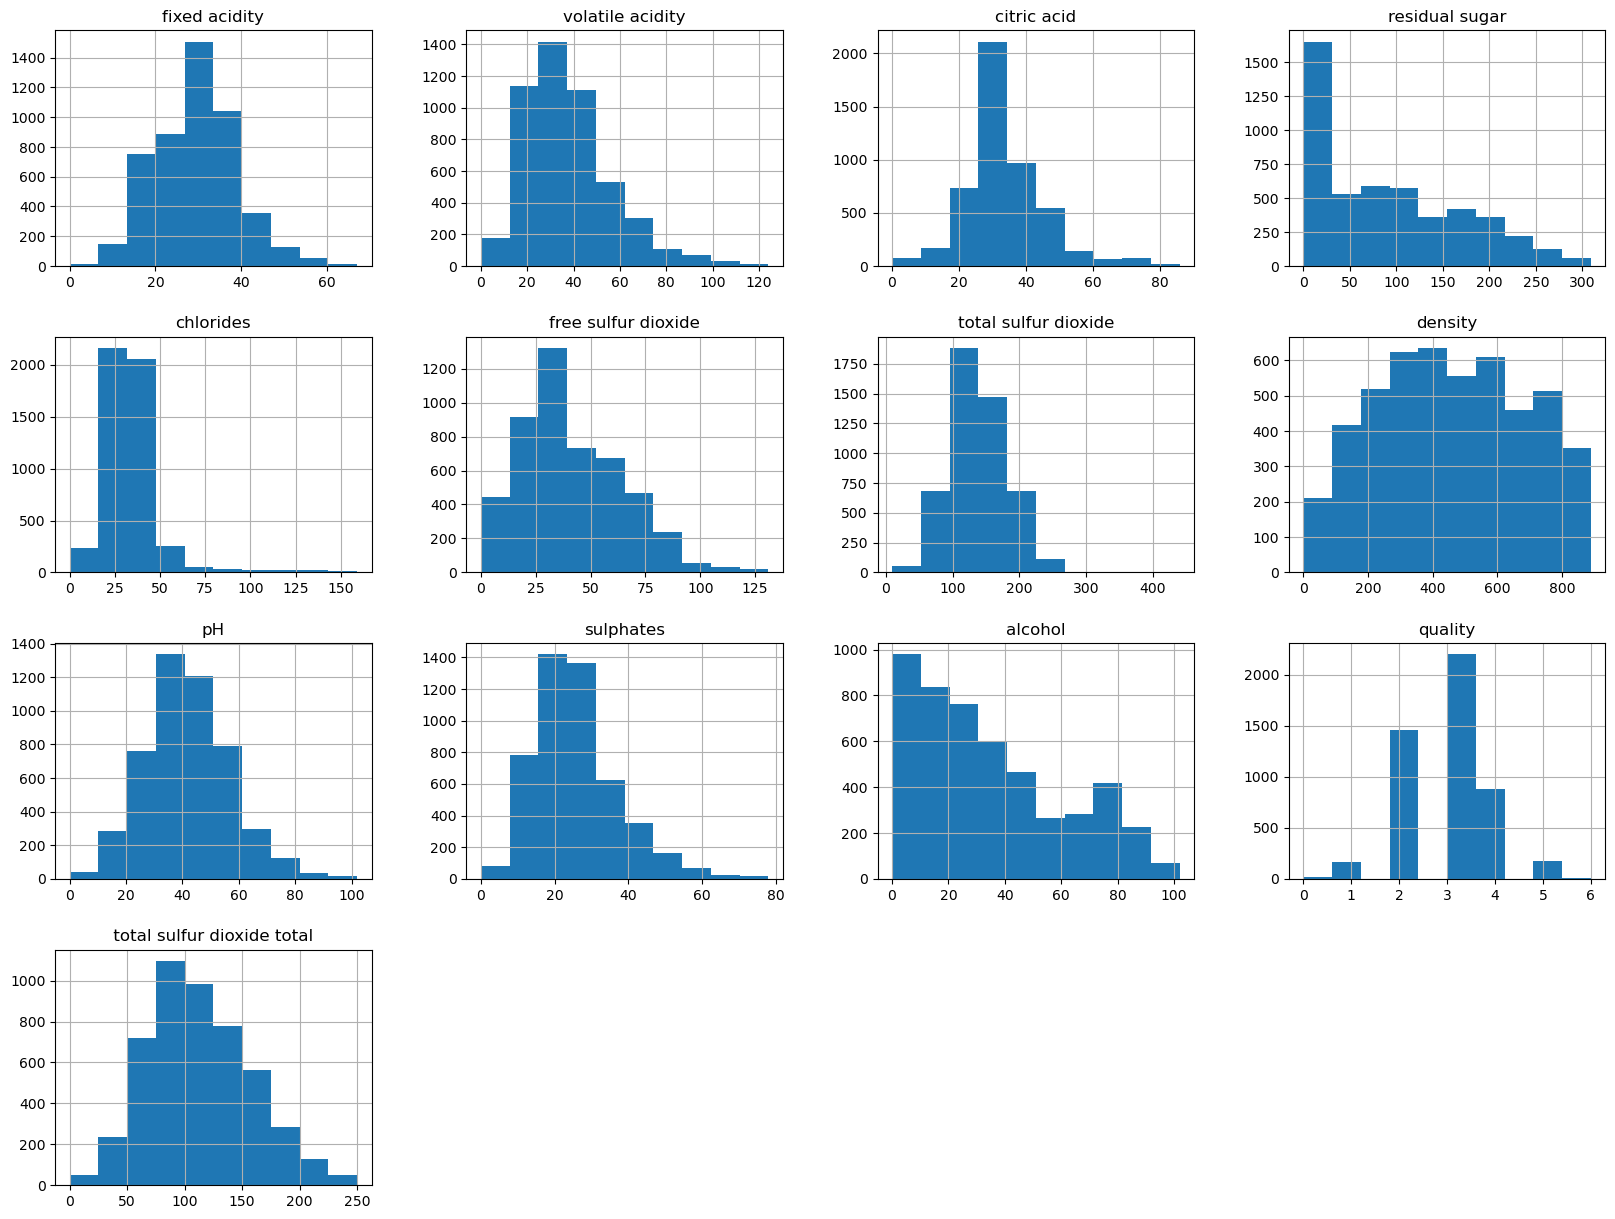

In [238]:
white.hist(figsize=(20,15));

alcohol
12    139
11    103
17     78
7      72
20     67
     ... 
19      1
8       1
9       1
5       1
30      1
Name: count, Length: 65, dtype: int64


<Axes: xlabel='alcohol', ylabel='count'>

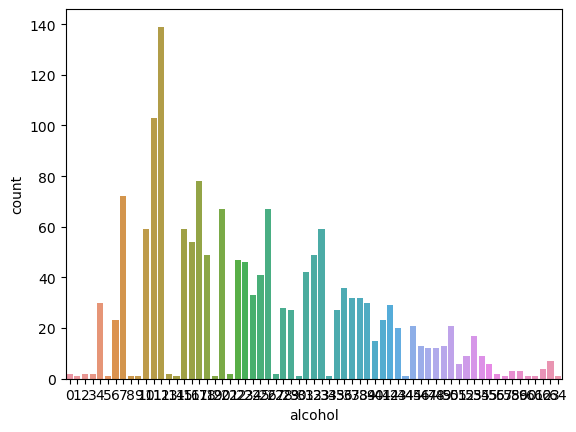

In [239]:
print(red['alcohol'].value_counts())
sns.countplot(x='alcohol',data=red)


alcohol
11     229
12     228
9      199
7      185
22     162
      ... 
101      1
52       1
45       1
51       1
71       1
Name: count, Length: 103, dtype: int64


<Axes: xlabel='alcohol', ylabel='count'>

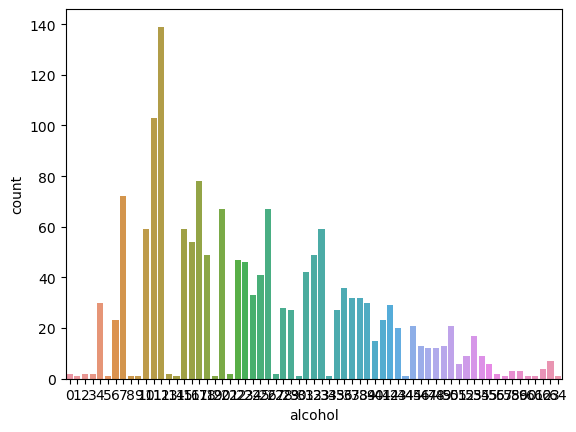

In [240]:
print(white['alcohol'].value_counts())
sns.countplot(x='alcohol',data=red)


free sulfur dioxide
6     138
4     104
10     79
15     78
12     75
7      71
9      62
16     61
17     60
11     59
13     57
8      56
14     50
2      49
18     46
3      41
21     41
19     39
24     34
26     32
23     32
20     30
27     29
25     24
29     23
28     23
22     22
32     22
31     20
34     18
30     16
35     15
36     11
33     11
39      9
43      7
41      6
40      5
49      4
51      4
46      3
0       3
45      3
44      3
52      3
37      3
58      2
55      2
50      2
38      2
53      1
59      1
56      1
48      1
5       1
1       1
47      1
54      1
42      1
57      1
Name: count, dtype: int64


<Axes: xlabel='free sulfur dioxide', ylabel='count'>

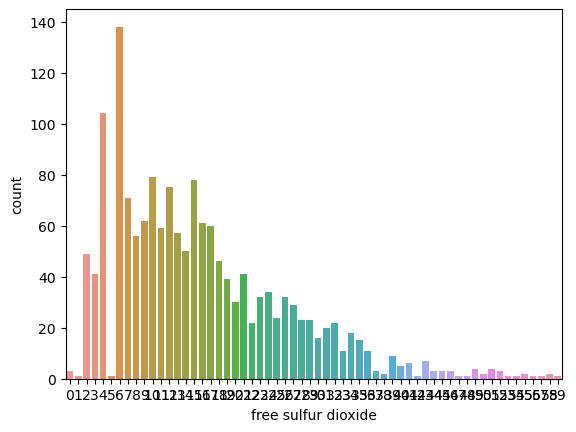

In [241]:
print(red['free sulfur dioxide'].value_counts())
sns.countplot(x='free sulfur dioxide',data=red)

free sulfur dioxide
32     160
35     132
28     129
39     129
38     128
      ... 
122      1
52       1
48       1
20       1
117      1
Name: count, Length: 132, dtype: int64


<Axes: xlabel='free sulfur dioxide', ylabel='count'>

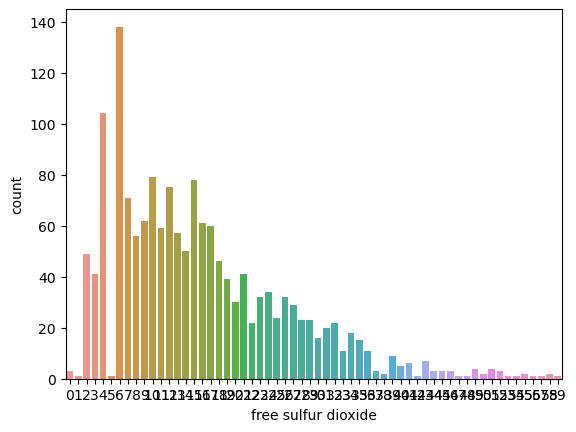

In [242]:
print(white['free sulfur dioxide'].value_counts())
sns.countplot(x='free sulfur dioxide',data=red)

In [243]:
red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality',
       ' total sulfur dioxide total '],
      dtype='object')

In [244]:
white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality',
       ' total sulfur dioxide total '],
      dtype='object')

<Axes: >

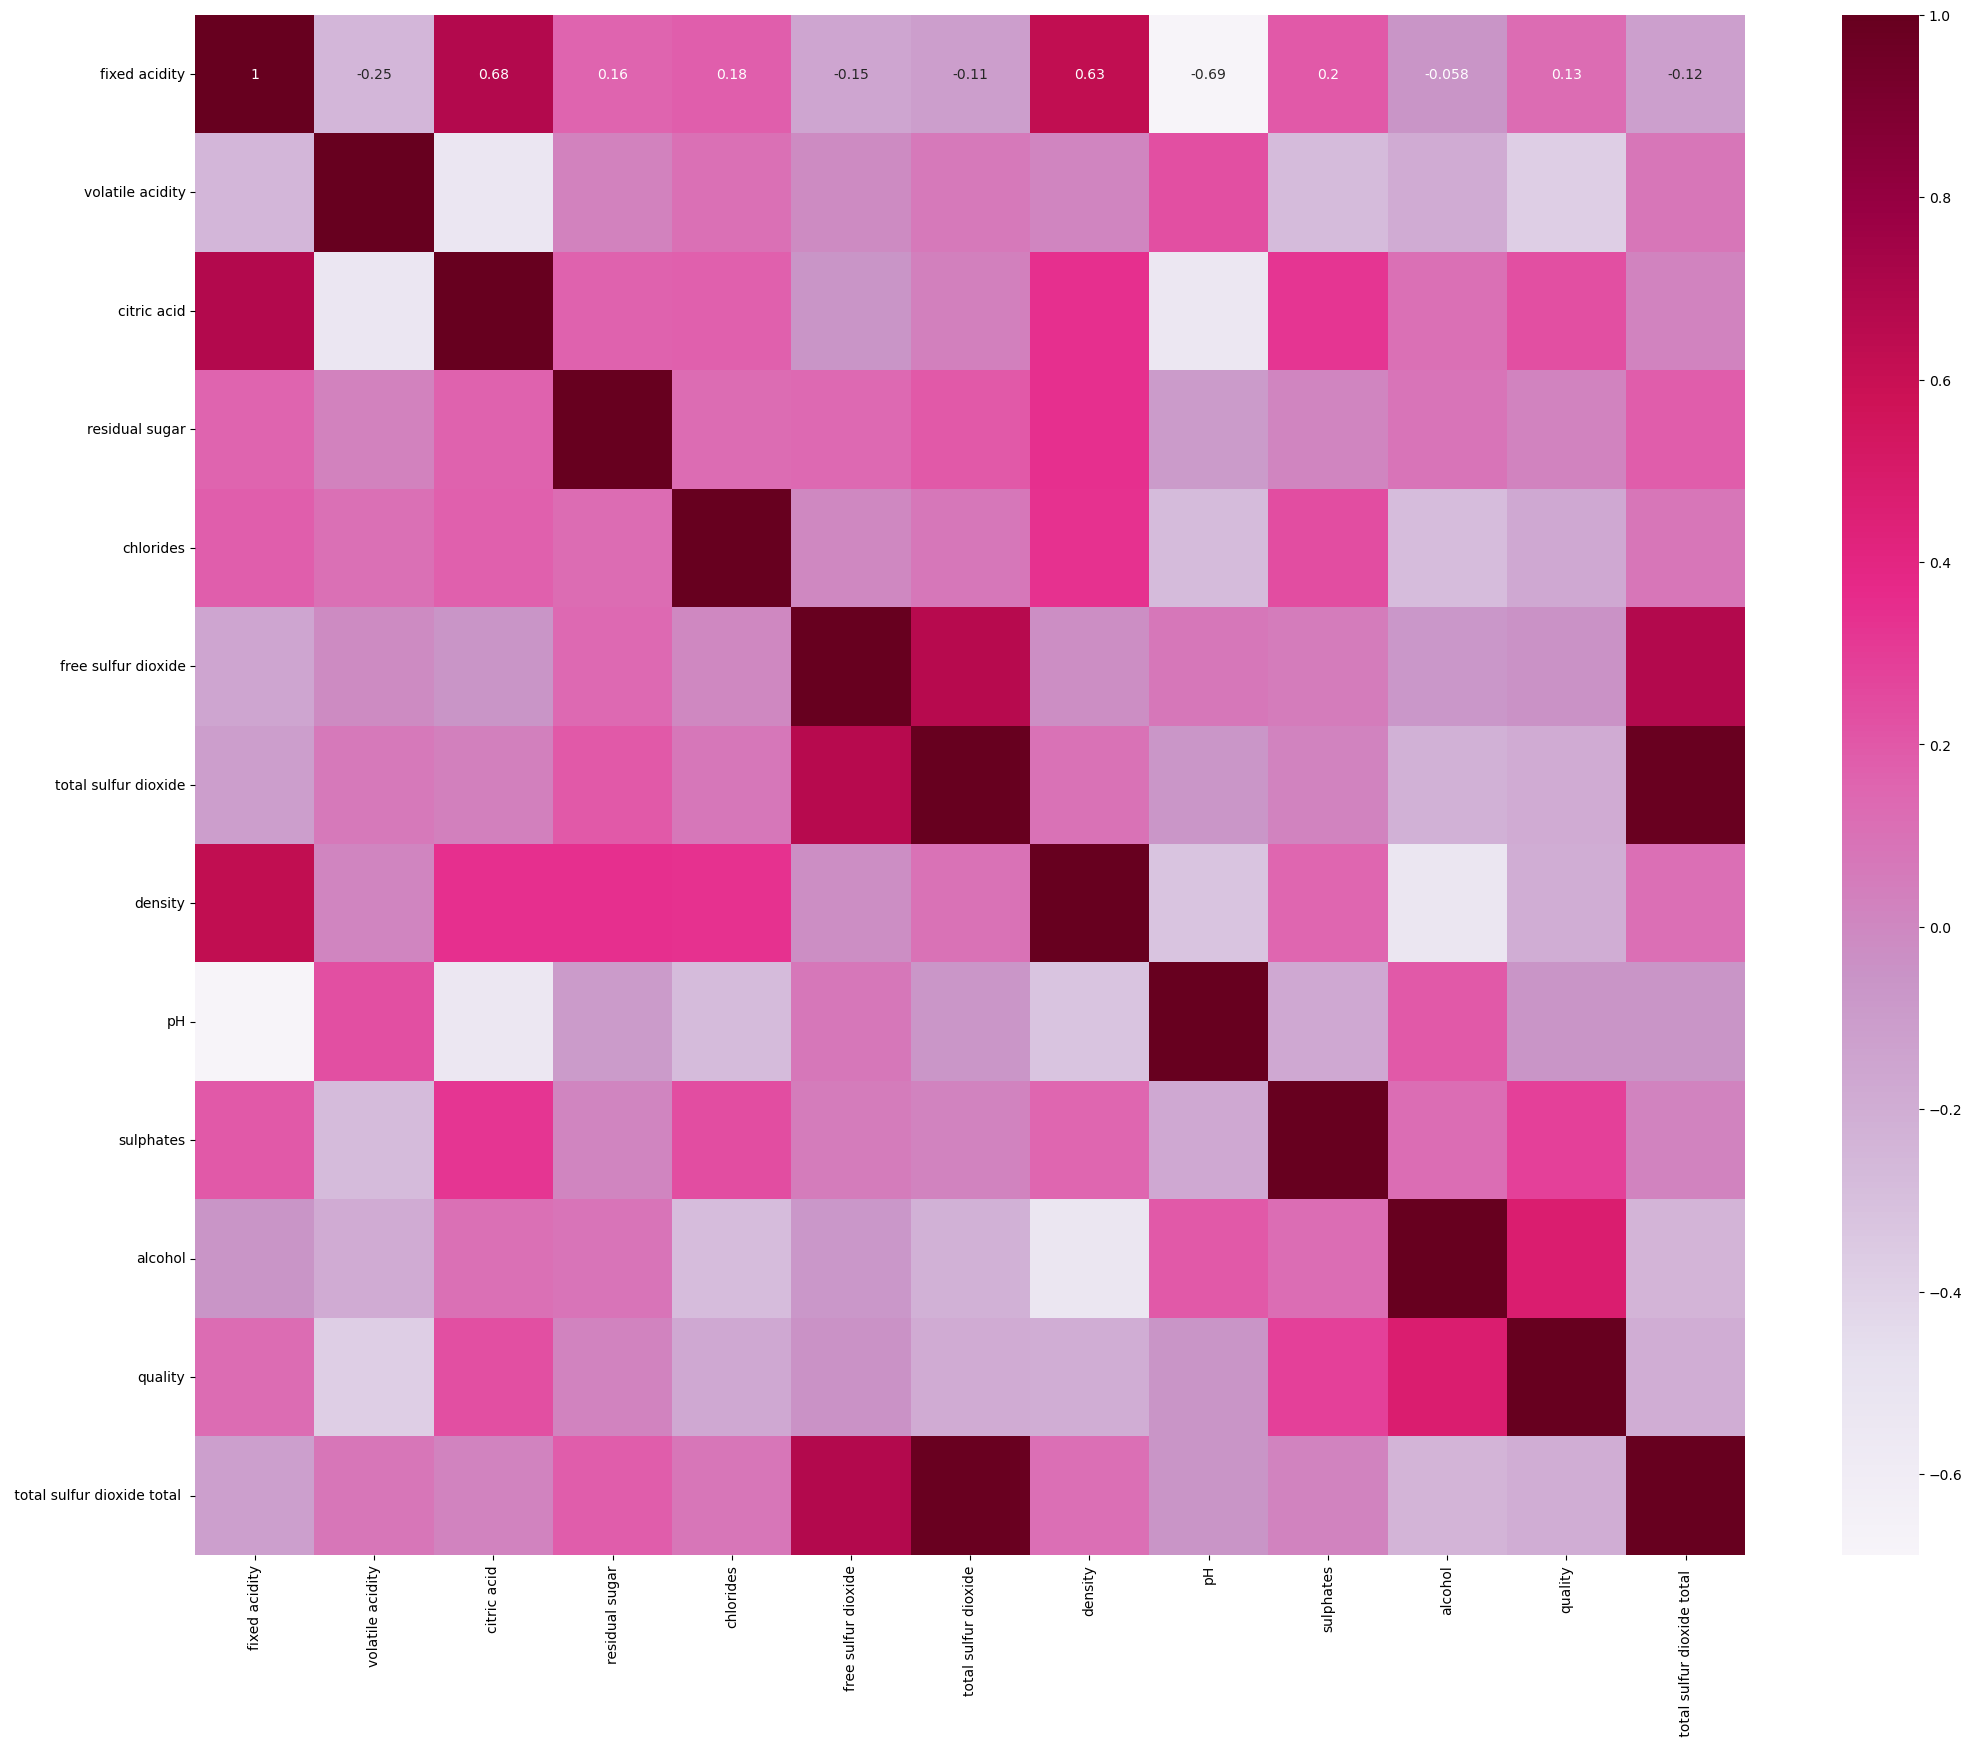

In [245]:
plt.figure(figsize=(25,20))
sns.heatmap(red.corr(), annot=True, cmap="PuRd")

<Axes: >

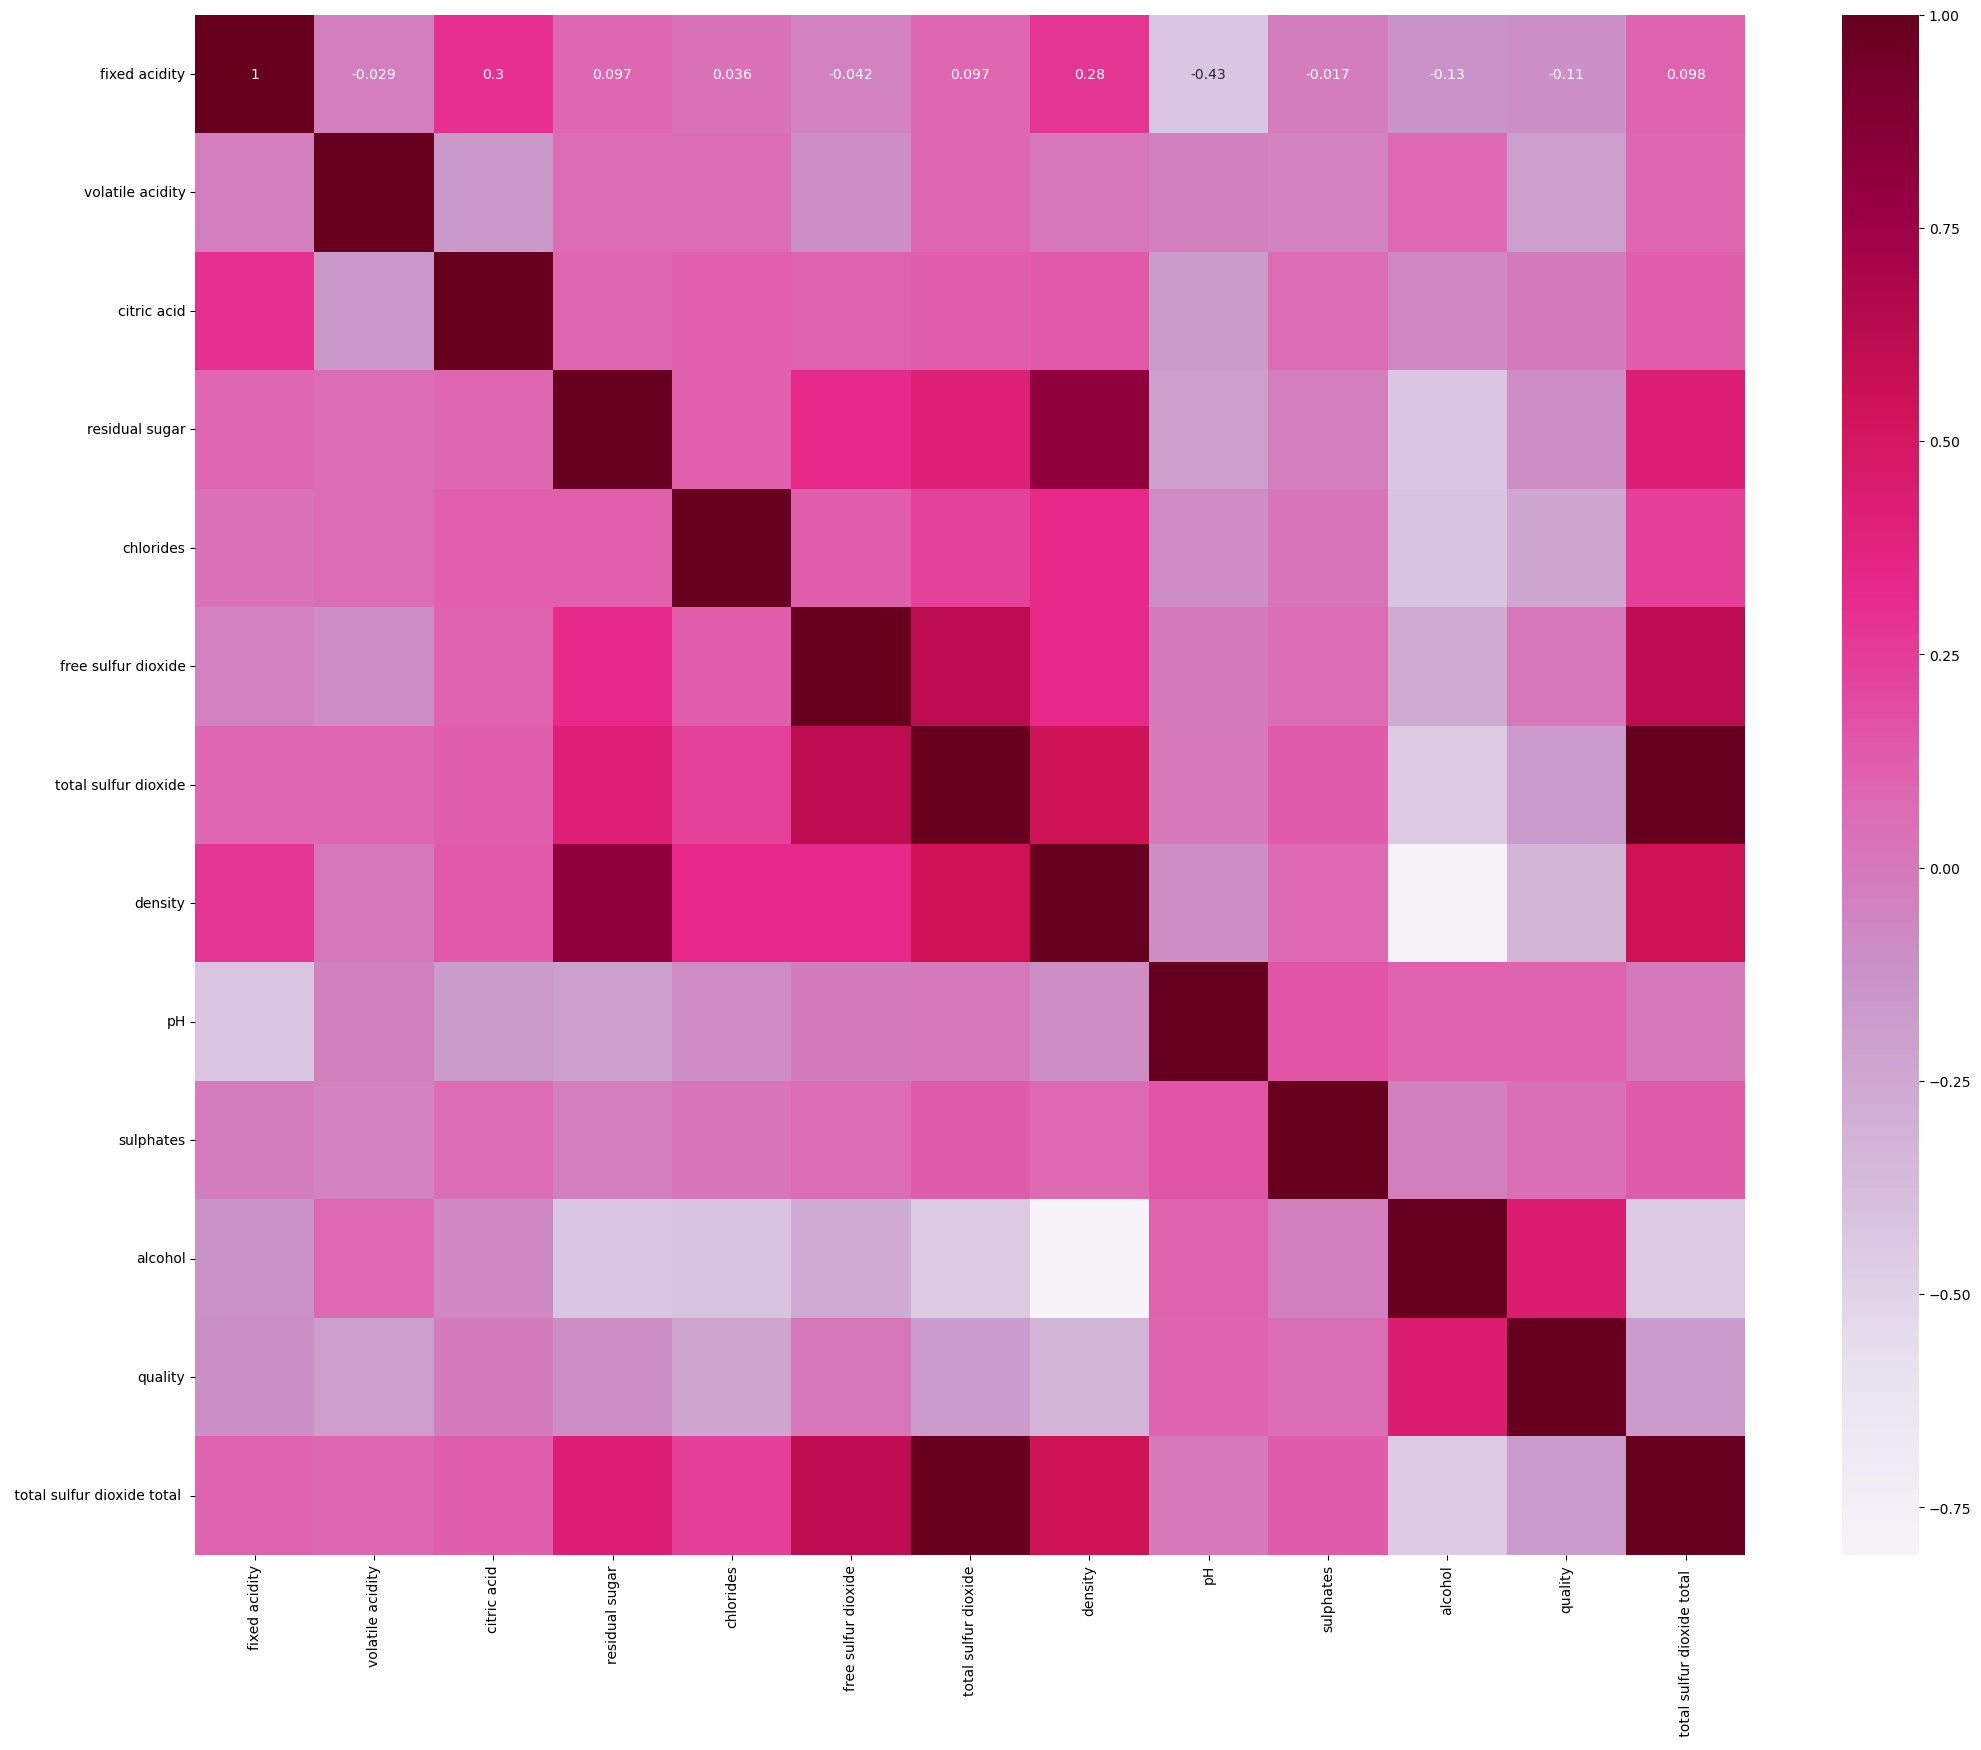

In [246]:
plt.figure(figsize=(25,20))
sns.heatmap(white.corr(), annot=True, cmap="PuRd")

In [291]:
x=red.drop('quality',axis=1)
y=red['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)

In [292]:
accuracies = {}
algo_time={}
r2_scores={}
mean_squared_errors={}
roc_auc_scores={}

In [293]:
def print_performance2(yt,clf,clf_name):
    y_pred=clf.predict(x_test)
    roc_auc_scores[clf_name]=roc_auc_score(yt,y_pred)*100
    mean_squared_errors[clf_name]=mean_squared_error(yt,y_pred)*100
    r2_scores[clf_name]=r2_score(yt,y_pred)*100
    accuracies[clf_name]=clf.score(x_train,y_train)*100
    print('ROC_AUC value :',roc_auc_scores[clf_name],"%",'\n')
    print("Mean Squared Error :",mean_squared_errors[clf_name],"%")
    print("\nR2 score is :",r2_scores[clf_name],"%")
    print("\nAccuracy Score :",accuracies[clf_name],"%")
    print('\nClassification Report : ','\n',classification_report(yt,y_pred))
    
    confusionmatrix=confusion_matrix(yt,y_pred)

    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusionmatrix.shape[0]):
        for j in range(confusionmatrix.shape[1]):
            ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)

In [296]:
def log_regression(red):
    # local variable to identify if the wine_set red or white
    w = red


    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    red['quality_c'] = red['quality'].map(recode)


    # split into training and testing sets
    predictors = red[["sulphates", 'alcohol']]
    targets = red.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

    # build model on training data
    classifier = LogisticRegression()
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)

     # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
    print ('Score:', classifier.score(pred_test, tar_test))
    print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)

print('----------------Logistic Regression------------------------')
log_regression(red)

----------------Logistic Regression------------------------
Confusion Matrix:
 [[195  97]
 [108 240]]
Accuracy: 0.6796875
Score: 0.6796875
RMSE: 0.5659615711335886


In [299]:
def decis_tree(red):
    # local variable to identify if the wine_set red or white
    w = red


    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    red['quality_c'] = red['quality'].map(recode)


    # split into training and testing sets
    predictors = red[['density', 'alcohol']]
    targets = red.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

    # build model on training data
    classifier = DecisionTreeClassifier()
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)

     # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
    print ('Score:', classifier.score(pred_test, tar_test))
    print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)

print('----------------Decision Tree------------------------')
decis_tree(red)

----------------Decision Tree------------------------
Confusion Matrix:
 [[190 105]
 [ 97 248]]
Accuracy: 0.684375
Score: 0.684375
RMSE: 0.5618051263561058


In [300]:
def knn(red):
    
    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    red['quality_c'] = red['quality'].map(recode)

    # split into training and testing sets
    predictors = red[['density', 'alcohol']]
    targets = red.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)
    
    
    # build model on training data
    classifier = KNeighborsClassifier()
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)

    # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
    print ('Score:', classifier.score(pred_test, tar_test))
    print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)

    
print('----------------KNN------------------------')
knn(red)

----------------KNN------------------------
Confusion Matrix:
 [[204  96]
 [116 224]]
Accuracy: 0.66875
Score: 0.66875
RMSE: 0.5755432216610669


In [305]:
def naive(red):
   
    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    red['quality_c'] = red['quality'].map(recode)

    # split into training and testing sets
    predictors = red[["density", 'alcohol', 'sulphates', 'pH']]
    targets = red.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)
    

    classifier = GaussianNB()
    classifier.fit(pred_train, tar_train)
    predictionsG = classifier.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictionsG))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictionsG))
    print("Gaus:" + str(classifier.score(pred_test, tar_test)))
    mse = mean_squared_error(predictionsG, tar_test)
    print('MSE:',mse ** 0.5)

    classifierm = MultinomialNB()
    classifierm.fit(pred_train, tar_train)
    predictionsM = classifierm.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('\nConfusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictionsM))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictionsM))
    print("Multi:" + str(classifierm.score(pred_test, tar_test)))
    mse = mean_squared_error(predictionsM, tar_test)
    print('MSE:',mse ** 0.5)

    classifierb = BernoulliNB()
    classifierb.fit(pred_train, tar_train)
    predictionsB = classifierb.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('\nConfusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictionsB))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictionsB))
    print("Bernoulli:" + str(classifierb.score(pred_test, tar_test)))
    mse = mean_squared_error(predictionsB, tar_test)
    print('MSE:',mse ** 0.5)
print('----------------Naive Bayes------------------------')
naive(red)

----------------Naive Bayes------------------------
Confusion Matrix:
 [[239  43]
 [161 197]]
Accuracy: 0.68125
Gaus:0.68125
MSE: 0.5645794895318107

Confusion Matrix:
 [[  0 282]
 [  0 358]]
Accuracy: 0.559375
Multi:0.559375
MSE: 0.6637959023675877

Confusion Matrix:
 [[  0 282]
 [  0 358]]
Accuracy: 0.559375
Bernoulli:0.559375
MSE: 0.6637959023675877
